In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
# Global path = "/global/scratch/users/adac/Slope_Flow/SlopeFlow/WRFV3/LES3/"
# Template file = "wrfout_d01_2014-03-21_12:00:00"

path = "../WRFV3/LES3"
file= "wrfout_d01_2014-03-21_12:00:00"

L1 = 3e3
L2 = 1e3

slope1 = 3*np.pi/180.
slope2 = 5*np.pi/180.

ds = xr.open_dataset(path+'/'+file)#+'.nc')
ds

<xarray.Dataset>
Dimensions:                (Time: 121, south_north: 149, west_east: 399,
                            bottom_top: 68, bottom_top_stag: 69,
                            soil_layers_stag: 4, west_east_stag: 400,
                            south_north_stag: 150)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag
Data variables: (12/153)
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 ...
    PC                     (Time, south_north, west_east) float32 ...
    LANDMASK               (Time, south_north, west_east) float32 ...
    LAKEMASK               (Time, south_north, west_east) float32 ...
    SST                    (Time, south_north, west_east) float32 ...
    SST_INPUT              (Time, south_north, west_east) float32 ...
Attributes: (12/119)
    TITLE:                            OUTPUT FROM WRF V3.9.1.1 MODEL
    START_DATE:                      2014-03-21_12:00:00
    SIMULATION_START_DATE:           2014-03-21_12:00:00
    WEST-EAST_GRID_DIMENSION:        400
    SOUTH-NORTH_GRID_DIMENSION:      150
    BOTTOM-TOP_GRID_DIMENSION:       69
    ...                              ...
    ISLAKE:                          0
    ISICE:                           0
    ISURBAN:                         0
    ISOILWATER:                      0
    HYBRID_OPT:                      -1
    ETAC:                            0.0

In [3]:
times = ds['Times']
timeStart = b'2014-03-22_03:50:00'
timeEnd = b'2014-03-22_04:50:00'
itimeStart = ds['Times'].values.tolist().index(timeStart)
itimeEnd = ds['Times'].values.tolist().index(timeEnd)
# times = [time.decode('utf-8') for time in times]
# times = to_datetime(times, format='%Y-%m-%d_%H:%M:%S')
nt = itimeEnd - itimeStart + 1
dt = 10/60 # 10 min/60(min/hr) = dt [hrs] 
tv = np.arange(0,nt*dt,dt).T

In [4]:
#nz = ds.dims["bottom_top"]
#ny = ds.dims["south_north"]
nx = ds.dims["west_east"]
dx = ds.attrs['DX']
ixstart = nx//2+int( L2/dx + 1 ) #+ 1 to start on low slope
ixend =  nx//2+int( (L1+L2)/dx )
xmid = nx/2*dx
xmid

9975.0

In [5]:
xv = np.arange(dx/2,nx*dx,dx) - xmid
x = np.tile(xv, (nt,1))
x.shape

(7, 399)

In [6]:
t = np.tile(tv, (nx,1)).T
t.shape

(7, 399)

In [7]:
# Crudely dividing by constant rho = 1.2 kg/m^3 and Ra = 1004 Jules / (Kg*K)
hfx = ds['HFX'][itimeStart:itimeEnd+1].mean(dim=["south_north"])/1.2/1004
hfx

<xarray.DataArray 'HFX' (Time: 7, west_east: 399)>
array([[-0.00018055, -0.00016673, -0.00015633, ..., -0.00023447,
        -0.00021575, -0.00019726],
       [-0.00020505, -0.00019811, -0.00018875, ..., -0.00021829,
        -0.00021415, -0.00021016],
       [-0.00018888, -0.00018809, -0.00018924, ..., -0.00020666,
        -0.00019852, -0.00019222],
       ...,
       [-0.00016561, -0.00017404, -0.00018414, ..., -0.00016428,
        -0.0001562 , -0.00015915],
       [-0.00067894, -0.00061935, -0.00060398, ..., -0.00059674,
        -0.00074399, -0.0007945 ],
       [-0.00027323, -0.00025807, -0.00024773, ..., -0.0002832 ,
        -0.00028984, -0.00028893]], dtype=float32)
Coordinates:
    XTIME    (Time) datetime64[ns] ...
Dimensions without coordinates: Time, west_east

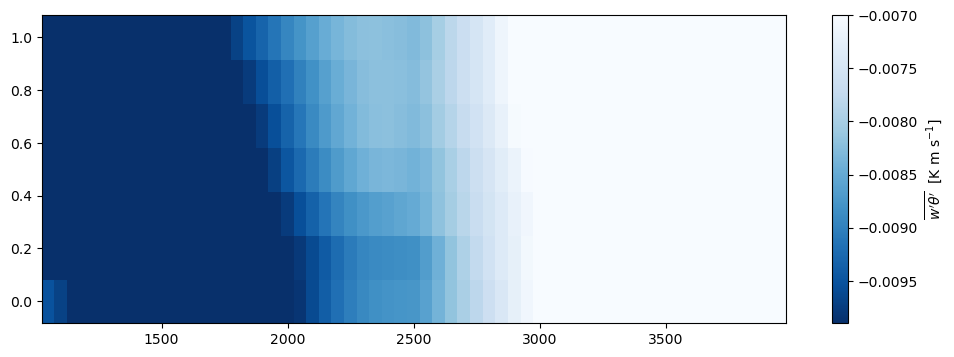

In [8]:
try:
    del(fig, axs)
    print("deleted old figure")
    fig, axs = plt.subplots( 1, 1, figsize=(12, 4) )
except:
    fig, axs = plt.subplots( 1, 1, figsize=(12, 4) )

cbarLabels = [r"$\overline{w'\theta'}$  [K m s$^{-1}$]"]
vmin = -0.015
vmax = 0
vmin = -0.007
vmax = -0.009

cf2 = axs.pcolor( x[:,ixstart:ixend], t[:,ixstart:ixend],hfx[:,ixstart:ixend].values, cmap="Blues_r", vmin=vmin, vmax=vmax)
# vmin, vmax = cf.get_clim()

plt.colorbar(
    cf2,
    ax=axs,
    norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax),
    cmap="Blues_r",label=cbarLabels[0]
)


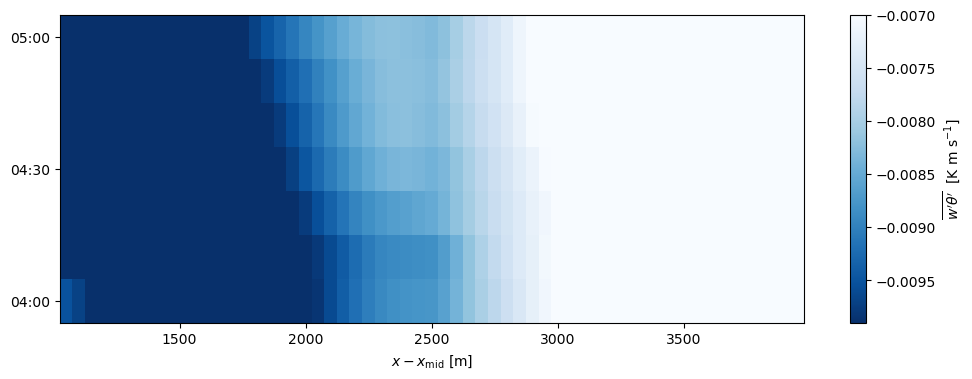

In [9]:
axs.set_xlabel(r'$x-x_{\text{mid}}$ [m]')
axs.set_yticks([0, 0.5 , 1])
axs.set_yticklabels(['04:00', '04:30', '05:00'])
fig

In [10]:
save=False
if save:
    plt.figure(fig)
    fmts=["png","eps"]
    for fmt in fmts:
        plt.savefig("plots/XTime_HFX."+fmt, format=fmt)